# Contexto

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attribute Information:

- age: the person's age in years
- sex: 0 = Female, 1 = Male
- cp: (4 values)
- trestbps: resting blood pressure
- chol: cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (0 = False, 1 = True)
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = Yes, 0 = No)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) 
- thal: a blood disorder called thalassemia (3=normal, 6=fixed defect, 7=reversable defect) 
- target: 0 = No, 1=Yes

# Descrição dos Dados

In [38]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [39]:
# Loading Data
df = pd.read_csv('datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [41]:
# Check duplicates
df.duplicated().sum()

723

In [42]:
# Drop duplicates
df = df.drop_duplicates()

In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Análise Exploratória dos Dados

<AxesSubplot:>

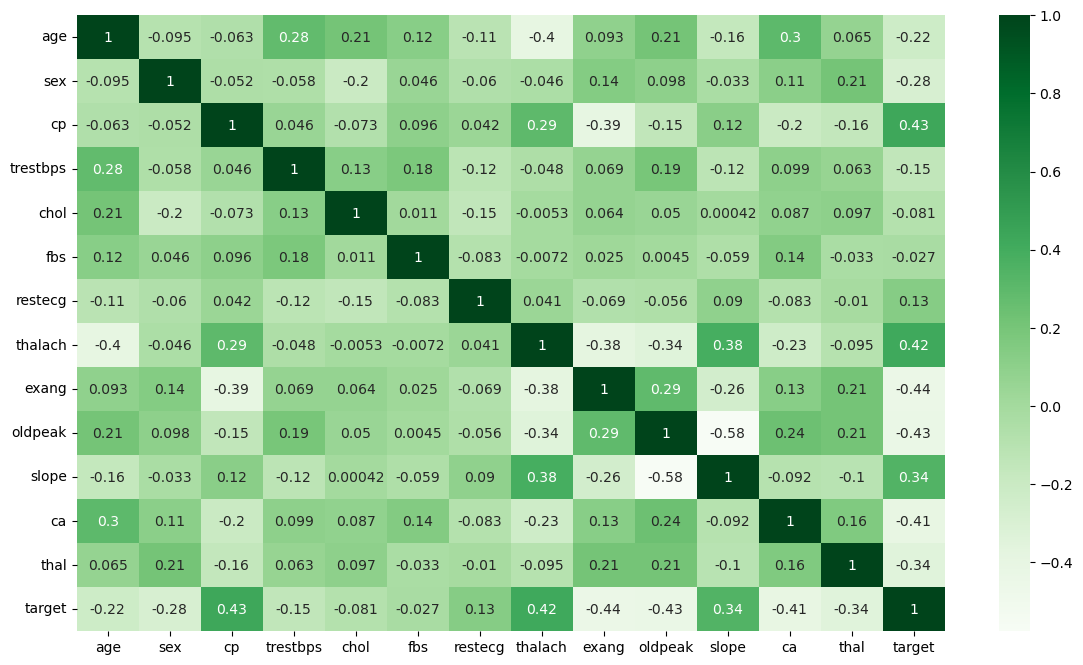

In [44]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [45]:
# EDA de forma manual
# Separar features
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'slope']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

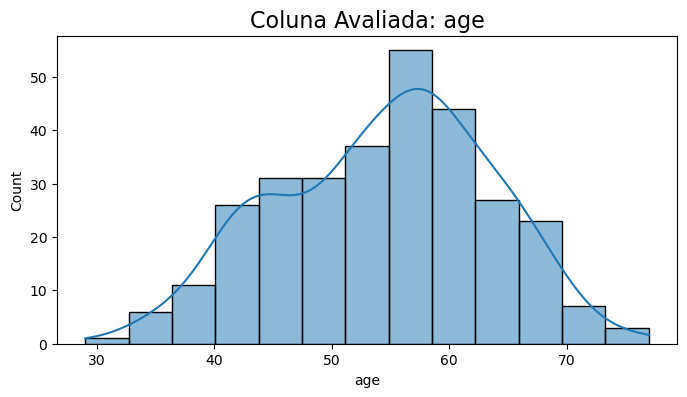

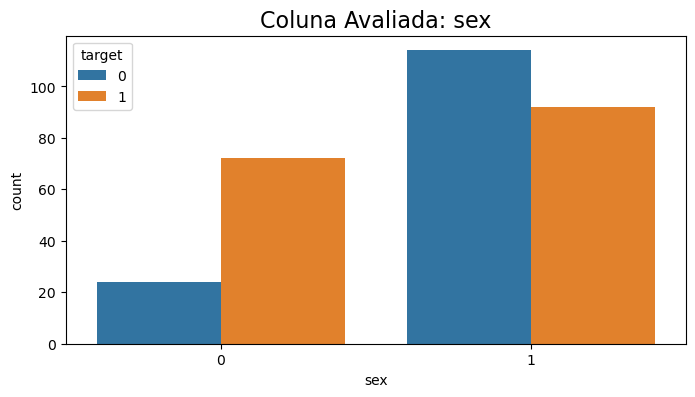

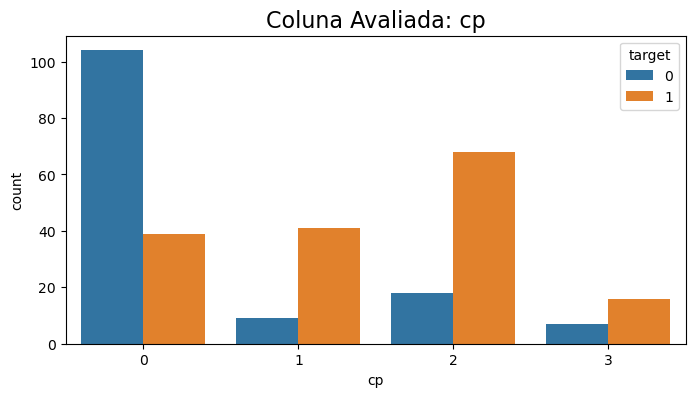

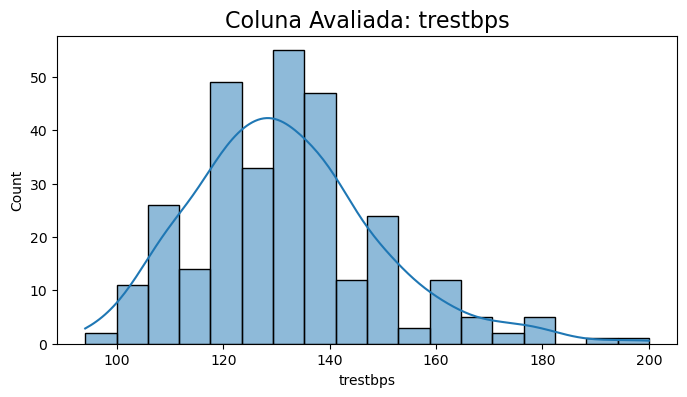

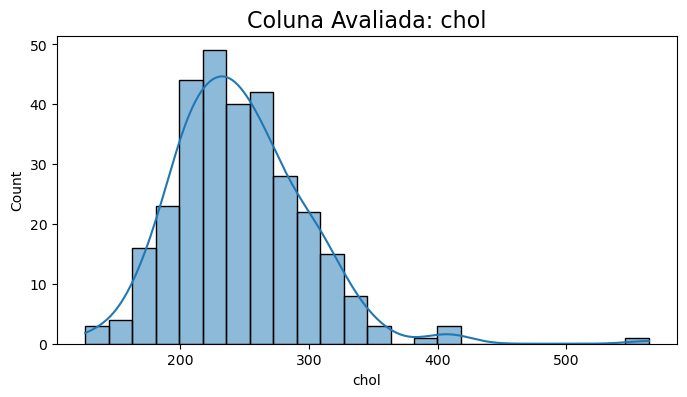

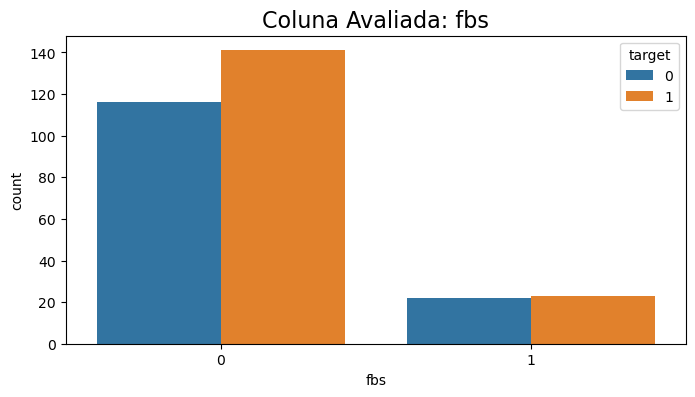

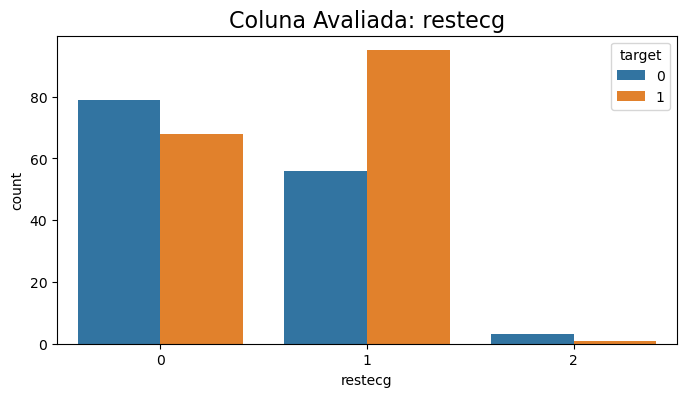

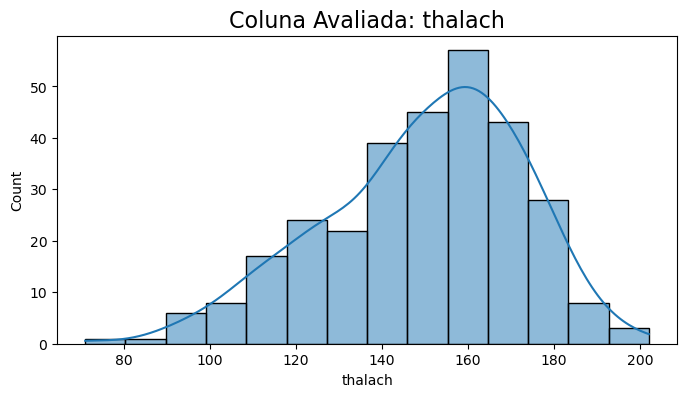

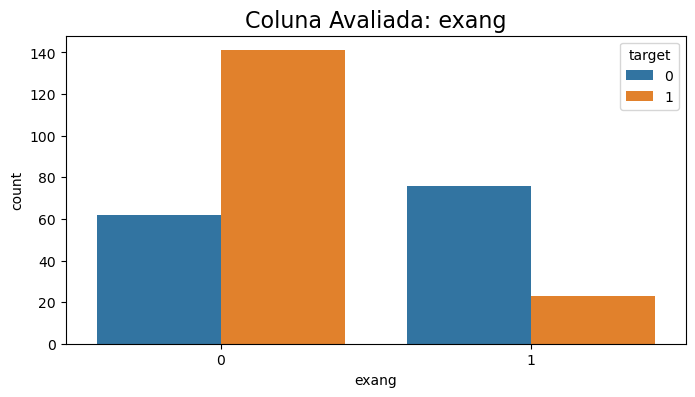

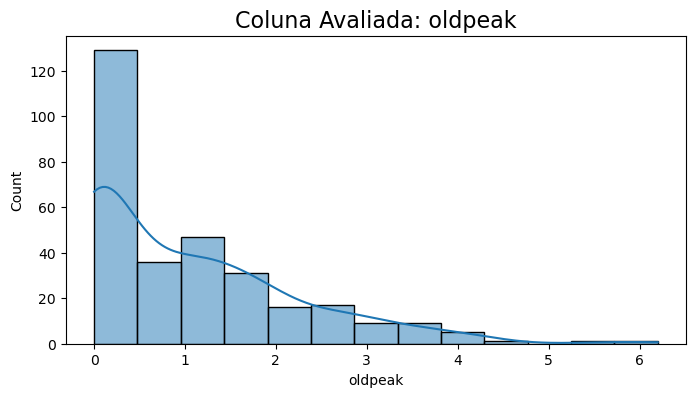

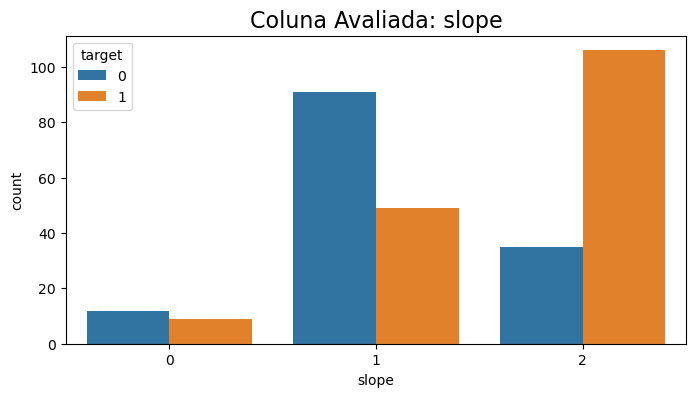

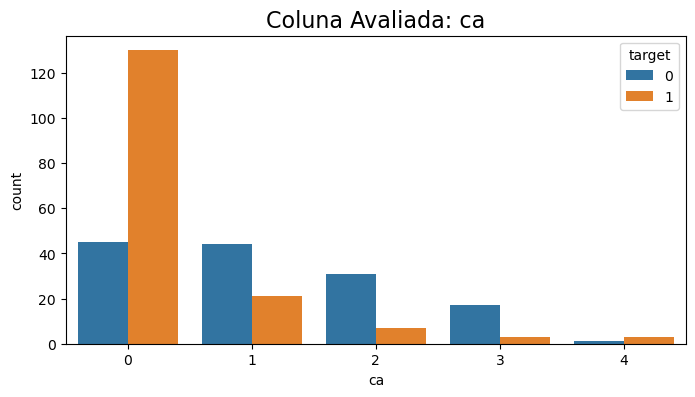

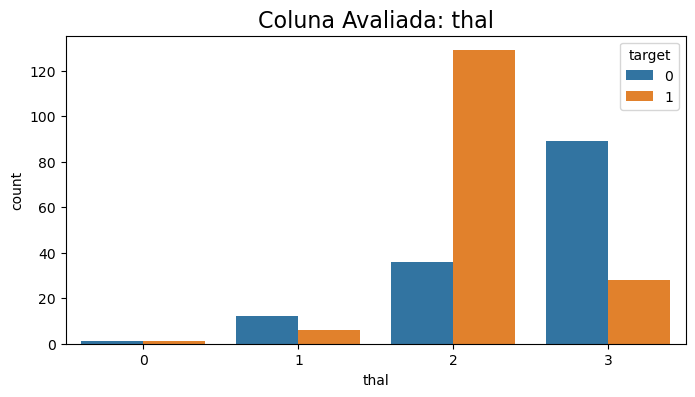

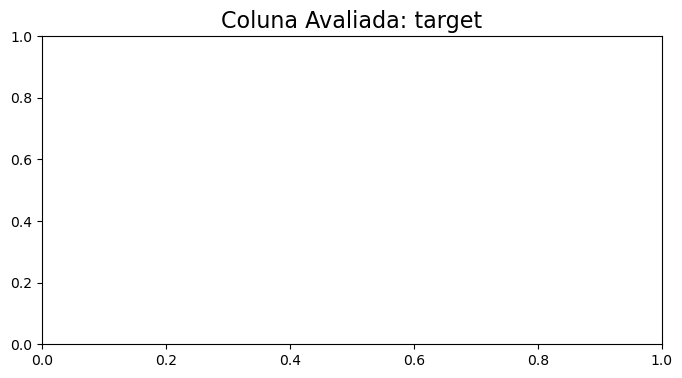

In [46]:
for c in df.columns:
    plt.figure(figsize=(8,4))
    plt.title(f'Coluna Avaliada: {c}', fontsize=16)
    if c in categoricas:
        sns.countplot(x=df[c], hue=df['target'])
    if c in numericas:
        sns.histplot(df[c], kde=True)

# Removendo Outliers

<AxesSubplot:>

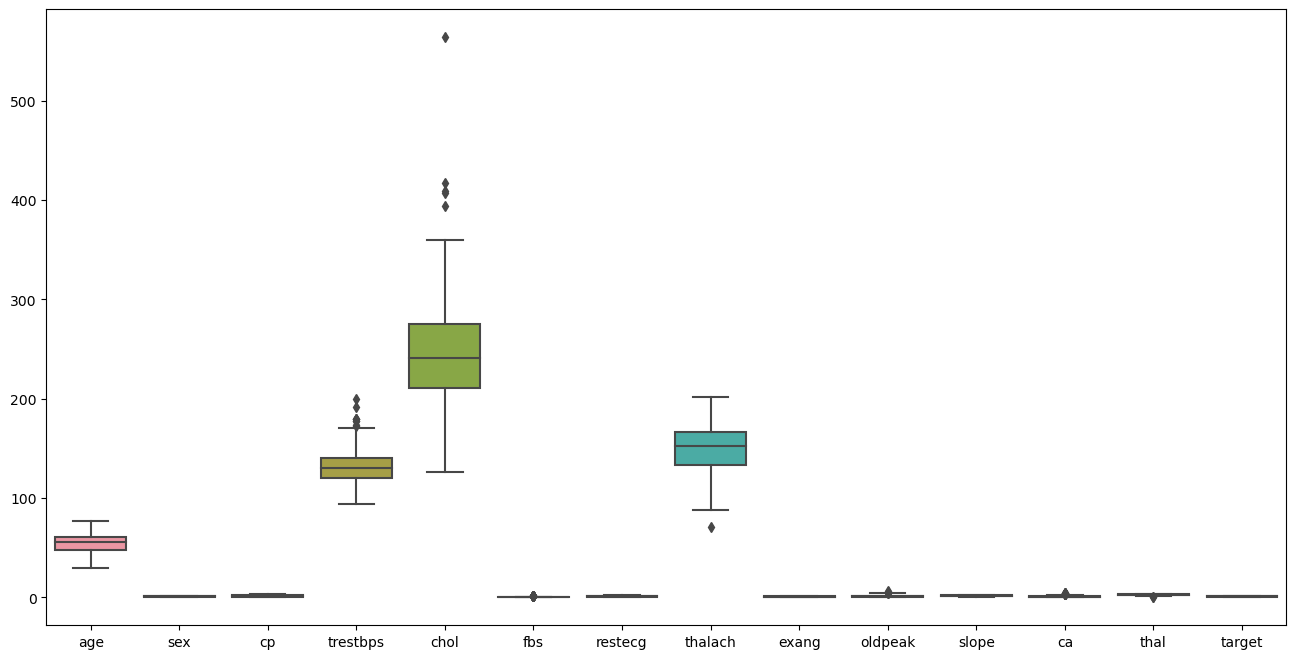

In [47]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Aqui, no caso deveríamos verificar quais realmente seriam os valores considerados outliers.

LIMITE SUPERIOR trestbps: Q3 + (1.5 * IIQ) ---- Resultado: 170

In [49]:
df['trestbps'].quantile(0.97)

170.0

In [50]:
# Removendo outliers da coluna trestbps
df1 = df[df['trestbps'] < df['trestbps'].quantile(0.97)]


<AxesSubplot:>

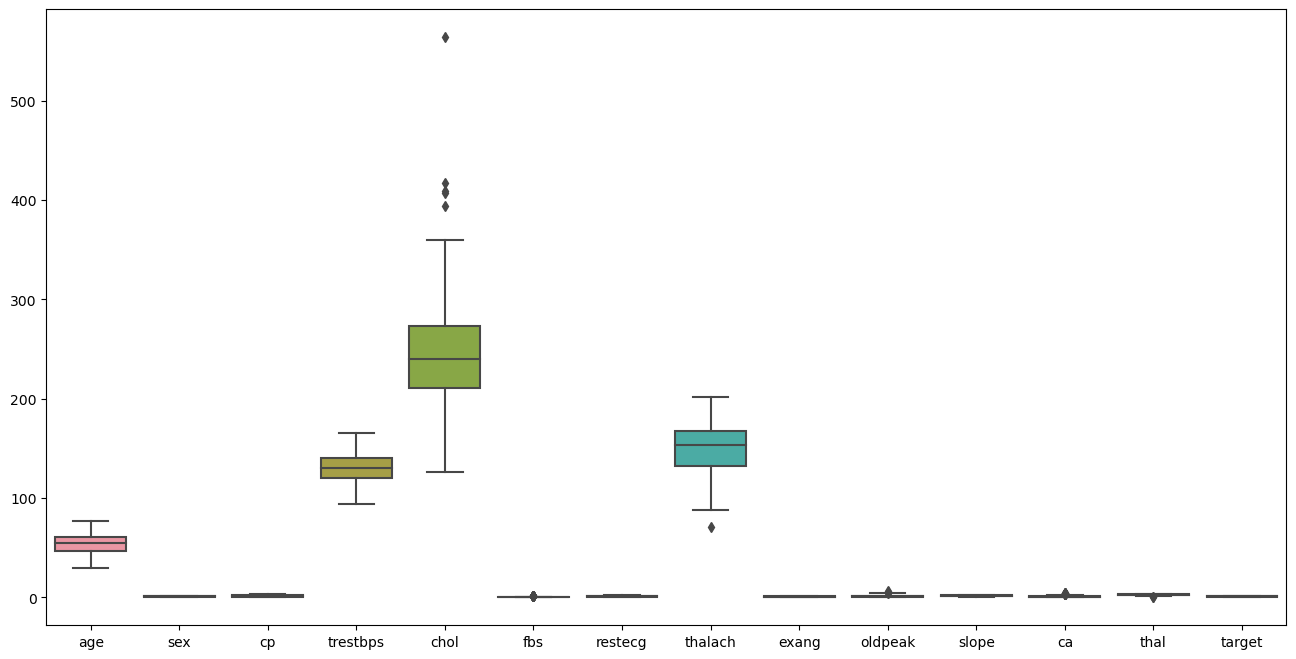

In [51]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df1)

In [52]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.193772,0.688581,0.958478,129.515571,245.446367,0.138408,0.529412,149.501730,0.314879,1.014879,1.415225,0.726644,2.301038,0.553633
std,9.132350,0.463877,1.019773,14.743899,51.954488,0.345927,0.520416,23.108759,0.465273,1.130582,0.607171,1.012774,0.608988,0.497977
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


LIMITE SUPERIOR chol: Q3 + (1.5 * IIQ) ---- Resultado: 366

In [53]:
df['chol'].quantile(0.984)

366.2560000000009

In [54]:
# Removendo outliers da coluna chol
df2 = df1[df1['chol'] < df1['chol'].quantile(0.984)]

<AxesSubplot:>

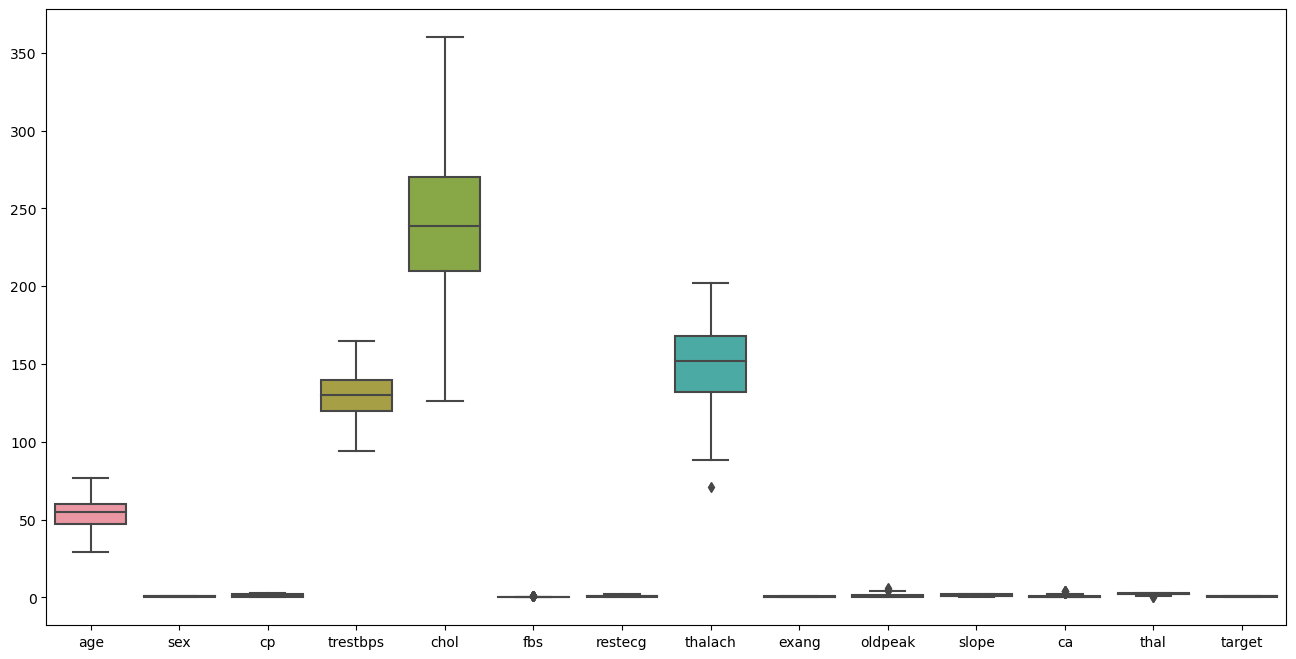

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df2)

In [56]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,54.045775,0.700704,0.961268,129.404930,242.052817,0.137324,0.538732,149.394366,0.316901,0.999296,1.419014,0.718310,2.295775,0.552817
std,9.130078,0.458758,1.020244,14.769421,44.811904,0.344797,0.520172,23.293323,0.466090,1.124636,0.609516,1.007857,0.609567,0.498080
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


LIMITE INFERIOR thalach: Q1 - (1.5 * IIQ) ---- Resultado: 78

In [57]:
df['thalach'].quantile(0.00137)

78.01029

In [58]:
# Removendo outliers da coluna thalach
df3 = df2[df2['thalach'] > df2['thalach'].quantile(0.00137)]

<AxesSubplot:>

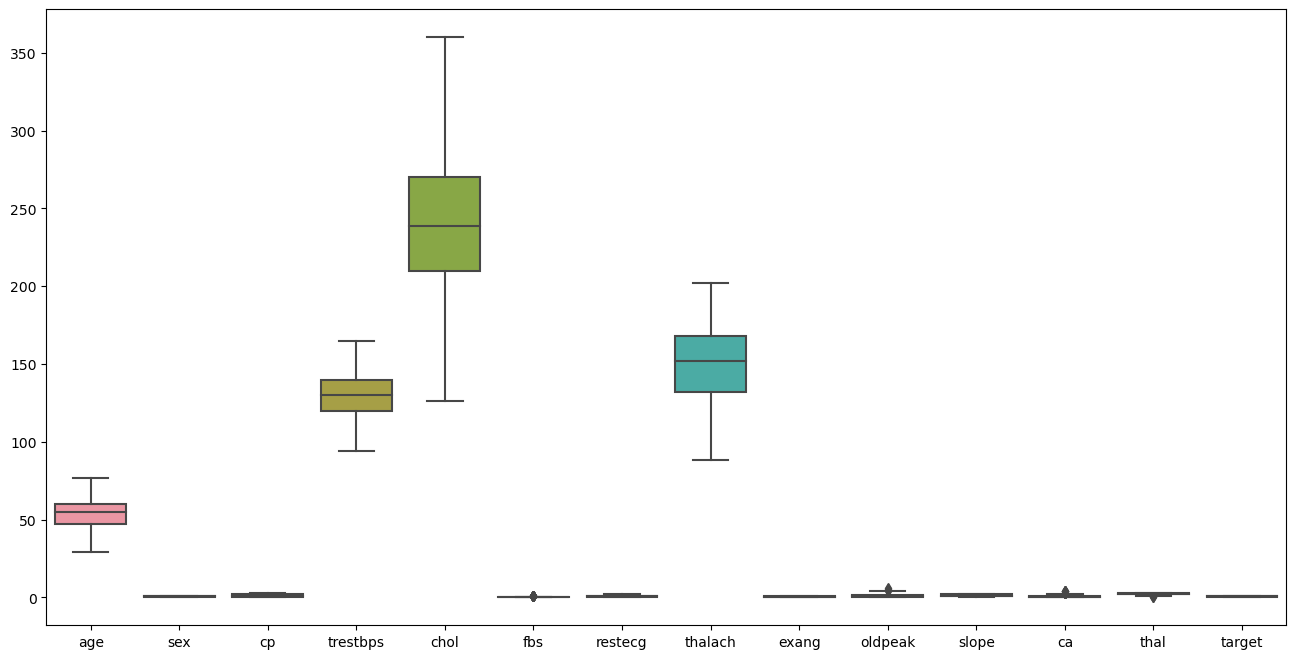

In [59]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df3)

In [60]:
df3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.000000,0.699647,0.964664,129.438163,242.070671,0.137809,0.537102,149.671378,0.318021,0.999293,1.420495,0.720848,2.296820,0.554770
std,9.113547,0.459224,1.020441,14.784944,44.890275,0.345310,0.520367,22.861163,0.466533,1.126628,0.610084,1.008733,0.610392,0.497872
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Pré-Processamento

In [61]:
df4 = pd.get_dummies(df3, columns=categoricas)
df4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,145,174,125,2.6,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
3,61,148,203,161,0.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


# Modelo

In [62]:
# Separar as features para o modelo
X = df4.drop('target', axis=1)
y = df4['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# StandardScaler
scaler = StandardScaler()

cols_scaler = numericas
X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])

X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

In [65]:
log = LogisticRegression(max_iter=1000)

In [66]:
# Train logistic model
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
# Predito
y_pred = log.predict(X_test)

In [68]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.8771929824561403

In [69]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.93      0.84      0.89        32

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



array([[23,  2],
       [ 5, 27]], dtype=int64)

In [70]:
tree = DecisionTreeClassifier()

In [71]:
# Train decision tree model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred_tree = tree.predict(X_test)

In [73]:
print(accuracy_score(y_test, y_pred_tree))

0.8070175438596491


In [74]:
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.86      0.78      0.82        32

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57

[[21  4]
 [ 7 25]]
